## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period. NOTE: Monthly seasonality, m=12 and weekly seasonailty in daily data, m=7

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from matplotlib import pyplot
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load the dataset

file = r'C:\Users\13134\Desktop\Time Series Analysis - Python\AirPassengers Dataset\AirPassengers.csv'

air_data = pd.read_csv(file, header=0, parse_dates=[0])

air_data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
air_data.tail()

,Month,Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [4]:
# Set the index (first column) to the month

air_data.index = air_data['Month'] 

In [5]:
air_data.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


### Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

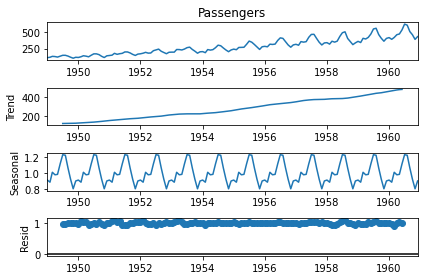

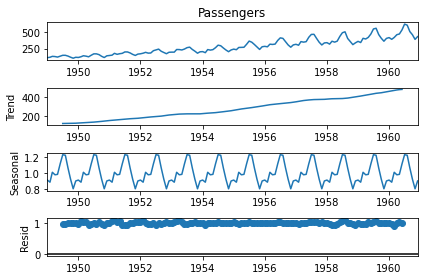

In [6]:
result_a = seasonal_decompose(air_data['Passengers'], model='multiplicative')
result_a.plot()

In [7]:
# we use order 1 because we are differencing by only 1 (first differenc).
# We use seasonal order 12 because our seasonality is yearly (12 months from that data)
model = SARIMAX(air_data['Passengers'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [8]:
model_fit = model.fit()

C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [9]:
residuals = model_fit.resid

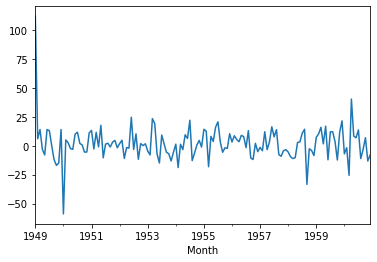

In [10]:
residuals.plot()

In [11]:
# Let's forecast the value for Jan 01, 1961

model_fit.forecast()

1961-01-01    448.5648
Freq: MS, dtype: float64

In [12]:
# Let's forecast for 30 months

model_fit.forecast(30)

1961-01-01    448.564800
1961-02-01    416.077946
1961-03-01    459.538594
1961-04-01    496.601737
1961-05-01    502.046272
1961-06-01    568.519692
1961-07-01    655.432342
1961-08-01    635.379498
1961-09-01    547.104414
1961-10-01    496.649031
1961-11-01    423.024463
1961-12-01    472.913065
1962-01-01    485.449194
1962-02-01    447.659676
1962-03-01    489.444035
1962-04-01    529.908820
1962-05-01    530.625824
1962-06-01    604.510691
1962-07-01    690.476793
1962-08-01    665.492883
1962-09-01    578.283532
1962-10-01    529.612390
1962-11-01    450.810835
1962-12-01    502.430825
1963-01-01    517.143541
1963-02-01    477.338061
1963-03-01    528.210886
1963-04-01    564.443954
1963-05-01    563.432429
1963-06-01    637.903446
Freq: MS, dtype: float64

In [13]:
# Now let's predict our values from Jan 01, 1949 to Dec 1, 1960 and match it against our actual data values

yhat = model_fit.predict()

In [14]:
yhat.head()

1949-01-01      0.000000
1949-02-01    111.997213
1949-03-01    118.000352
1949-04-01    131.999526
1949-05-01    128.998947
Freq: MS, dtype: float64

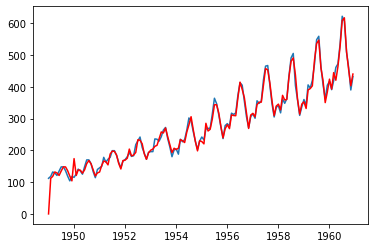

In [15]:
pyplot.plot(air_data['Passengers'])
pyplot.plot(yhat, color='red')

**The blue lines are the original data values and the red lines are our predicted values using our model. There is not so much variations in the two lines**